### Exploratory notebook for reading in and manipulating dataframes. Goal is to create one dataframe by combining Real Property Sale, Parcel, and Residential Building Record

##### Importing necessary libraries for data exploration and manipulation

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import src.mc_functions as mc

In [4]:
df = mc.create_dataframe()

### Creating Real Property Sales dataframe

In [99]:
df_propsales = pd.read_csv('../../data/EXTR_RPSale.csv')


In [55]:
df_propsales.columns.values

array(['ExciseTaxNbr', 'Major', 'Minor', 'DocumentDate', 'SalePrice',
       'RecordingNbr', 'Volume', 'Page', 'PlatNbr', 'PlatType', 'PlatLot',
       'PlatBlock', 'SellerName', 'BuyerName', 'PropertyType',
       'PrincipalUse', 'SaleInstrument', 'AFForestLand',
       'AFCurrentUseLand', 'AFNonProfitUse', 'AFHistoricProperty',
       'SaleReason', 'PropertyClass', 'SaleWarning'], dtype=object)

### Function to add zeros for the 'minor' column 

In [56]:
def add_minor_leading_zeros(minors):
    # Empty list to store formatted minor codes in
    f_minors = []
    # loop through current minors and add leading zeros
    for minor in minors:
        #convert minor to str and split
        s = [num for num in str(minor)]
        # length of current minor code
        l = len(s)
        # list with 4 zeros
        f_minor = ['0', '0', '0', '0']
        # take current minor and add to end of list
        f_minor[4-l:] = s
        #join list into str
        f_minor = ''.join(f_minor)
        # convert to int append to formatted minors list
        f_minors.append(f_minor)
    return f_minors

### Function to add zeros to 'Major' column

In [57]:
def add_major_leading_zeros(majors):
    # Empty list to store formatted major codes in
    f_majors = []
    # loop through current majors and add leading zeros
    for major in majors:
        #convert major to str and split
        s = [num for num in str(major)]
        # length of current major code
        l = len(s)
        # list with 6 zeros
        f_major = ['0', '0', '0', '0', '0', '0']
        # take current major and add to end of list
        f_major[6-l:] = s
        #join list into str
        f_major = ''.join(f_major)
        # convert to int append to formatted majors list
        f_majors.append(f_major)
    return f_majors

In [100]:
df_propsales['Minor'] = add_minor_leading_zeros(df_propsales['Minor'])

In [101]:
df_propsales['Major'] = add_major_leading_zeros(df_propsales['Major'])

### Each row in this dataframe represents one or more records for a property sale

Selecting the rows in the dataframe that are necessary for our analysis, year 2019.

In [528]:
year = [True if int(x[6:]) == 2019 else False for x in df_propsales['DocumentDate']]
df_propsales = df_propsales[year]
df_propsales

,ExciseTaxNbr,Major_minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
4,3027422,2130430120,12/20/2019,560000,20191226000848,,,,,,...,11,6,3,N,N,N,N,1,8,
118,2999169,9197150200,07/08/2019,192000,20190712001080,,,,,,...,3,2,3,N,N,N,N,1,3,
144,3000673,8944440200,06/26/2019,185000,20190722001395,,,,,,...,3,2,3,N,N,N,N,1,3,
164,3002257,9406520630,07/22/2019,435000,20190730001339,,,,,,...,11,6,3,N,N,N,N,1,8,
445,2980836,9376300695,03/28/2019,550000,20190404001008,,,,,,...,3,6,3,N,N,N,N,1,8,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089056,3004408,0660002210,08/07/2019,41040000,20190812000849,,,,,,...,3,7,22,N,N,N,N,18,2,45
2089057,3004408,0660002225,08/07/2019,41040000,20190812000849,,,,,,...,3,7,22,N,N,N,N,18,2,45
2089058,3004408,0660002195,08/07/2019,41040000,20190812000849,,,,,,...,3,7,22,N,N,N,N,18,2,45
2089059,3004408,0660002220,08/07/2019,41040000,20190812000849,,,,,,...,3,7,22,N,N,N,N,18,2,45


In [102]:
df_propsales['Major_minor'] = df_propsales['Major']+df_propsales['Minor']

In [523]:
cols = list(df_propsales)
# move the column to head of list using index, pop and insert
cols.insert(1, cols.pop(cols.index('Major_minor')))
df_propsales = df_propsales.loc[:,cols]

### Dropping Major and Minor columns since we have a combined column for the two

In [115]:
df_propsales = df_propsales.drop('Major', axis=1)
df_propsales = df_propsales.drop('Minor', axis=1)

In [116]:
df_propsales

,ExciseTaxNbr,Major_minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2687551,1388600110,08/21/2014,245000,20140828001436,,,,,,...,3,6,3,N,N,N,N,1,8,
1,1235111,6648850040,07/09/1991,0,199203161090,071,001,664885,C,B102,...,3,0,26,N,N,N,N,18,3,11
2,2704079,4239430050,10/11/2014,0,20141205000558,,,,,,...,3,6,15,N,N,N,N,18,8,18 31 51
3,2584094,4037000715,01/04/2013,0,20130110000910,,,,,,...,3,6,15,N,N,N,N,11,8,18 31 38
4,3027422,2130430120,12/20/2019,560000,20191226000848,,,,,,...,11,6,3,N,N,N,N,1,8,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089094,2019480,3586500040,02/04/2004,635100,20040223000241,,,,,,...,3,6,3,N,N,N,N,1,8,
2089095,2441236,1471570300,05/10/2010,565000,20100514000554,,,,,,...,3,6,3,N,N,N,N,1,8,
2089096,2862289,0421069058,05/01/2017,0,20170502001588,,,,,,...,3,6,15,N,N,N,N,10,8,36 31 51
2089097,2111818,8873000076,03/28/2005,892500,20050331000561,,,,,,...,3,6,3,N,N,N,N,1,8,


### Reading in Parcel dataframe

In [ ]:
df_parcel = pd.read_csv('../../data/EXTR_Parcel.csv', encoding='latin-1')

#### Each row in this dataframe represents one record for each parcel of real property

### Adding zeros to the Minor and Major columns of dataframe

In [118]:
df_parcel['Minor'] = add_minor_leading_zeros(df_parcel['Minor'])

In [119]:
df_parcel['Major'] = add_major_leading_zeros(df_parcel['Major'])

### Combining Minor and Major columns for unique identifier. The values when added together from both columns is the unique identifier for sale records.

In [120]:
df_parcel['Major_minor'] = df_parcel['Major'] + df_parcel['Minor']

### Moving Major_minor column to where Major and Minor previously were. We will not need to have them both since we have a combined column storing values from major and minor together.

In [124]:
cols = list(df_parcel)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Major_minor')))
df_parcel = df_parcel.loc[:,cols]

### Removing Major and Minor columns since we now have a combined column for the two

In [ ]:
df_parcel = df_parcel.drop('Major', axis=1)
df_parcel = df_parcel.drop('Minor', axis=1)

In [129]:
df_parcel

,Major_minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,QuarterSection,PropType,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,9161100346,,WARDALL PARK ADD,20-21-22,3,3,24,14,SW,R,...,N,N,N,N,N,N,N,N,N,N
1,1326069228,,NaN,,,6,26,13,SE,R,...,N,N,N,N,N,N,N,N,N,N
2,3298700012,,HIGHLAND PARK,2,1,4,24,31,SW,R,...,N,N,N,N,N,N,N,N,N,N
3,8845300050,,UPPERS H S LIBERTY HEIGHTS ADD,9,1,3,24,26,SW,R,...,N,N,N,N,N,N,N,N,N,N
4,2617300220,,FOUR LAKES,2,3,6,23,27,NE,R,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614838,8662500300,,TOP OF THE HILL,30,,5,22,20,NW,R,...,N,N,N,N,N,N,N,N,N,N
614839,1441000280,,CEDAR AVENUE,28,,5,23,29,SW,R,...,N,N,N,N,N,N,N,N,N,N
614840,7231501373,SERVICE LINEN,RENTON TOWN OF,4-5-6 &,16,5,23,17,SW,C,...,N,N,N,N,N,N,N,N,N,N
614841,0656000390,THE OLD VINE COURT BUILDING,BELL AND DENNYS 2ND ADD,1-2,33,4,25,31,NW,C,...,N,N,N,N,N,N,N,N,N,N


Reading in Residential Building Record Description dataframe

### Each row in this dataframe represents one record for each residential building

In [28]:
df_resbuild = pd.read_csv('../../data/EXTR_ResBldg.csv')

In [30]:
df_resbuild.columns.values

array(['Major', 'Minor', 'BldgNbr', 'NbrLivingUnits', 'Address',
       'BuildingNumber', 'Fraction', 'DirectionPrefix', 'StreetName',
       'StreetType', 'DirectionSuffix', 'ZipCode', 'Stories', 'BldgGrade',
       'BldgGradeVar', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
       'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtUnfinHalf',
       'SqFtTotLiving', 'SqFtTotBasement', 'SqFtFinBasement',
       'FinBasementGrade', 'SqFtGarageBasement', 'SqFtGarageAttached',
       'DaylightBasement', 'SqFtOpenPorch', 'SqFtEnclosedPorch',
       'SqFtDeck', 'HeatSystem', 'HeatSource', 'BrickStone',
       'ViewUtilization', 'Bedrooms', 'BathHalfCount', 'Bath3qtrCount',
       'BathFullCount', 'FpSingleStory', 'FpMultiStory', 'FpFreestanding',
       'FpAdditional', 'YrBuilt', 'YrRenovated', 'PcntComplete',
       'Obsolescence', 'PcntNetCondition', 'Condition', 'AddnlCost'],
      dtype=object)

### Adding zeros to Major and Minor columns 

In [130]:
df_resbuild['Minor'] = add_minor_leading_zeros(df_resbuild['Minor'])
df_resbuild['Major'] = add_major_leading_zeros(df_resbuild['Major'])

### Combining Major and Minor columns for unique identifier

In [131]:
df_resbuild['Major_minor'] = df_resbuild['Major'] + df_resbuild['Minor']

### Moving Major_minor column to where Major and Minor previously were

In [132]:
cols = list(df_resbuild)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Major_minor')))
df_resbuild = df_resbuild.loc[:,cols]

### Removing Major and Minor columns since we now have a combined column for the two

In [133]:
df_resbuild = df_resbuild.drop('Major', axis=1)
df_resbuild = df_resbuild.drop('Minor', axis=1)

In [135]:
df_resbuild

,Major_minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,0461000935,1,1,7349 10TH AVE NW 98117,7349,,,10TH,AVE,NW,...,0,0,0,1927,0,0,0,0,3,0
1,0461001165,1,1,7342 11TH AVE NW 98117,7342,,,11TH,AVE,NW,...,0,0,0,2019,0,53,0,0,3,0
2,0461001720,1,1,7330 13TH AVE NW 98117,7330,,,13TH,AVE,NW,...,0,0,0,2019,0,0,0,0,3,0
3,0461001745,1,1,7348 13TH AVE NW 98117,7348,,,13TH,AVE,NW,...,0,0,0,1910,2005,0,0,0,3,0
4,0461001930,1,1,7306 14TH AVE NW 98117,7306,,,14TH,AVE,NW,...,1,0,1,1955,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515258,3751602283,1,1,35228 55TH AVE S 98001,35228,,,55TH,AVE,S,...,0,1,0,1976,0,0,0,0,4,0
515259,3751602309,1,1,35256 55TH AVE S,35256,,,55TH,AVE,S,...,0,0,0,2018,0,0,0,0,3,0
515260,3751602361,1,1,35428 55TH AVE S,35428,,,55TH,AVE,S,...,0,0,0,2018,0,0,0,0,3,0
515261,3751602363,1,1,35431 56TH AVE S,35431,,,56TH,AVE,S,...,0,0,0,2017,0,0,0,0,3,0


### Joining the 3 dataframes into one

In [529]:
df1 = df_propsales
df2 = df_parcel
df3 = df_resbuild


In [541]:
df_parcel['NbrBldgSites']

0         0
1         0
2         0
3         0
4         0
         ..
614838    0
614839    0
614840    0
614841    0
614842    0
Name: NbrBldgSites, Length: 614843, dtype: int64

In [530]:
df_propsales.head()

,ExciseTaxNbr,Major_minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
4,3027422,2130430120,12/20/2019,560000,20191226000848,,,,,,...,11,6,3,N,N,N,N,1,8,
118,2999169,9197150200,07/08/2019,192000,20190712001080,,,,,,...,3,2,3,N,N,N,N,1,3,
144,3000673,8944440200,06/26/2019,185000,20190722001395,,,,,,...,3,2,3,N,N,N,N,1,3,
164,3002257,9406520630,07/22/2019,435000,20190730001339,,,,,,...,11,6,3,N,N,N,N,1,8,
445,2980836,9376300695,03/28/2019,550000,20190404001008,,,,,,...,3,6,3,N,N,N,N,1,8,


In [531]:
df1_cols = ['Major_minor', 'DocumentDate', 'SalePrice']
df2_cols = ['Major_minor', 'SqFtLot', 'TrafficNoise', 'AirportNoise', 'PowerLines', 'OtherNuisances']
df3_cols = ['Major_minor', 'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck', 'SqFtTotLiving']
df_all_total = df1[df1_cols].merge(df2[df2_cols], how='inner', on=['Major_minor']).merge(df3[df3_cols], how='inner', on=['Major_minor'])

In [532]:
df_all_total.head()

,Major_minor,DocumentDate,SalePrice,SqFtLot,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,SqFtTotLiving
0,2130430120,12/20/2019,560000,10523,0,0,N,N,180,0,0,1930
1,9406520630,07/22/2019,435000,7392,0,0,N,N,45,0,0,1975
2,9376300695,03/28/2019,550000,2500,0,0,N,N,0,0,200,1560
3,0984000450,02/20/2019,409950,7875,0,0,N,N,0,0,140,1850
4,0302000645,03/04/2019,380000,45303,0,0,N,N,670,0,0,1750


In [534]:
df_all_total.shape

(43867, 12)

### Converting dataframe to SQL table for simpler analysis. I will use queries to get some useful information about property sale price factors
#### Importing sqlite3
#### Importing create_engine from sqlalchemy to create an Engine object based on a URL

In [19]:
import src.jw_total_df as jw
df = jw.create_dataframe()

In [20]:
import sqlite3

from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

In [21]:
df = df[df['SalePrice'] < 20000000]
df = df[df['SalePrice'] > 0]

In [23]:
df.duplicated().sum()

0

In [192]:
df.to_sql('kk_c_housing', con=engine)

In [26]:
eng = engine

In [27]:
eng.execute('''SELECT * FROM k_c_housing''').fetchall()

[(0, 3027422, '213043', '0120', '12/20/2019', 560000, '20191226000848', '   ', '   ', '      ', ' ', '              ', '       ', 'DOYLE REGAN M+STERLING C                          ', 'SHAW HEATHER C                                    ', 11, 6, 3, 'N', 'N', 'N', 'N', 1, 8, ' ', 1, 1, '27033  NE DOROTHY ST   98019', '27033', '   ', 'NE', 'DOROTHY                  ', 'ST    ', '  ', '98019', 1.0, 7, 0, 1930, 0, 0, 0, 0, 0, 1930, 0, 0, 0, 0, 550, ' ', 180, 0, 0, 5, 2, 0, ' ', 3, 0, 0, 2, 1, 0, 0, 0, 1989, 0, 0, 0, 0, 3, 0, ' ', 'DUVALL HILLS DIV NO. 04', '12            ', '       ', 6, 26, 13, 'SE', 'R', 70.0, 2.0, None, None, 'DUVALL', 1155, 'R4.5', 1, 1, 2, 10523, 2, 2, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'N', 'N', 0, 0, 0, 0, 'N', 'N', 0, 0, 'N', 'N', 'N', 0, 0, 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N'),
 (1, 3002257, '940652', '0630', '07/22/2019', 435000, '20190730001339', '   ', '   ', '      ', 

In [184]:
housing_data = pd.read_sql('''SELECT * FROM k_c_housing''', con=engine)
housing_data.columns

Index(['index', 'ExciseTaxNbr', 'Major', 'Minor', 'DocumentDate', 'SalePrice',
       'RecordingNbr', 'Volume', 'Page', 'PlatNbr',
       ...
       'SeismicHazard', 'LandslideHazard', 'SteepSlopeHazard', 'Stream',
       'Wetland', 'SpeciesOfConcern', 'SensitiveAreaTract', 'WaterProblems',
       'TranspConcurrency', 'OtherProblems'],
      dtype='object', length=152)

In [188]:
df['WfntLocation'] = housing_data['WfntLocation']

### Selecting housing records that have a porch/deck and converting to dataframe so we can begin creating a model.

In [17]:
np.array(df.columns)

array(['Major', 'Minor', 'SalePrice', 'PropertyClass', 'SqFtTotLiving',
       'SqFtOpenPorch', 'SqFtEnclosedPorch', 'TrafficNoise', 'PowerLines',
       'OtherNuisances', 'TidelandShoreland', 'has_porch'], dtype=object)

In [208]:
df_h_porch = pd.read_sql('''SELECT COUNT(SalePrice)
                FROM k_c_housing
                WHERE SqFtOpenPorch > '0'
                OR SqFtEnclosedPorch > '0'
                AND PropertyType = 'R'
                ''', con=engine)

In [209]:
df_h_porch

,COUNT(SalePrice)
0,15617


In [207]:
df.shape

(29895, 151)

In [205]:
df_no_porch = pd.read_sql('''SELECT COUNT(SalePrice)
                FROM k_c_housing
                WHERE SqFtOpenPorch = '0'
                OR SqFtEnclosedPorch = '0'
                AND PropertyType = 'R'
                ''', con=engine)

In [206]:
df_no_porch

,COUNT(SalePrice)
0,14278


### Selecting the records that do not have a porch

In [ ]:
df_no_porch_ct = pd.read_sql('''SELECT SalePrice
                FROM k_c_housing
                WHERE SqFtOpenPorch = '0'
                OR SqFtEnclosedPorch = '0'
                AND PropertyType = 'R'
                ''', con=engine)

In [111]:
df_no_porch

,SalePrice
0,550000
1,409950
2,193000
3,775000
4,540000
...,...
14273,4775000
14274,638000
14275,2075000
14276,835000


### Selecting the records that do have a porch

In [43]:
df_porch_ct = pd.read_sql('''SELECT SalePrice
                FROM k_c_housing
                WHERE SqFtOpenPorch > '0'
                OR SqFtEnclosedPorch > '0'
                AND PropertyType > 'R'
                ''', con=engine)

In [31]:
df_no_porch

,AVG(SalePrice)
0,688968.75844


### Selecting the average sale prices of homes with a nuisance

In [182]:
df_nuisance = pd.read_sql('''SELECT AVG(SalePrice)
                FROM k_c_housing
                WHERE TrafficNoise > '0'
                OR PowerLines > '0'
                OR OtherNuisances > '0'
                AND PropertyType = 'R'
                ''', con=engine)

In [183]:
df_nuisance

,AVG(SalePrice)
0,823222.818331


### Selecting the average sale prices of homes without a nuisance

In [227]:
df_no_nuisance = pd.read_sql('''SELECT AVG(SalePrice)
                FROM k_c_housing
                WHERE TrafficNoise = '0'
                OR PowerLines = '0'
                OR OtherNuisances = '0'
                AND PropertyType = 'R'
                ''', con=engine)

In [228]:
df_no_nuisance

,AVG(SalePrice)
0,822272.052283


In [199]:
df.min()

ExciseTaxNbr             2968844
Major                     000100
Minor                       0001
DocumentDate          01/01/2019
SalePrice                      5
                         ...    
SpeciesOfConcern               N
SensitiveAreaTract             N
WaterProblems                  N
TranspConcurrency              N
OtherProblems                  N
Length: 146, dtype: object

Number of sale records for houses that do not have a nuisance.

In [265]:
df_nuisance_ct = pd.read_sql('''SELECT COUNT(SalePrice)
                FROM k_c_housing
                WHERE TrafficNoise > '0'
                OR PowerLines = 'Y'
                OR OtherNuisances = 'Y'
                AND PropertyType = 'R'
                ''', con=engine)

In [266]:
df_nuisance_ct

,COUNT(SalePrice)
0,4662


In [250]:
df_nuisance_ct = pd.read_sql('''SELECT COUNT(SalePrice)
                FROM k_c_housing
                WHERE TrafficNoise > '1'
                OR PowerLines != 'N'
                OR OtherNuisances != 'N'
                AND PropertyType = 'R'
                ''', con=engine)

### Selecting the average sale price for houses that are on the waterfront

In [267]:
waterfront = pd.read_sql('''SELECT AVG(SalePrice)
                FROM k_c_housing
                WHERE TidelandShoreland > '1'
                OR WfntLocation > '0'
                AND PropertyType = 'R'
                ''', con=engine)

In [268]:
waterfront

,AVG(SalePrice)
0,2.806178e+06


In [ ]:
Tideshoreland = pd.read_sql('''SELECT AVG(SalePrice)
                FROM k_c_housing
                WHERE TidelandShoreland = '0'
                OR PowerLines = '0'
                OR OtherNuisances = '0'
                AND PropertyType = 'R'
                ''', con=engine)

In [450]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

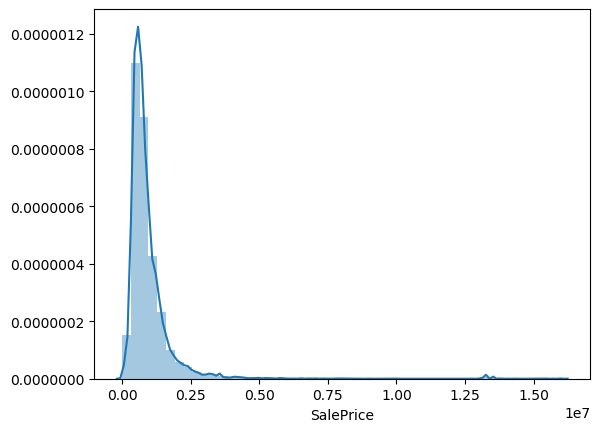

In [119]:
sns.distplot(df_h_porch['SalePrice'])

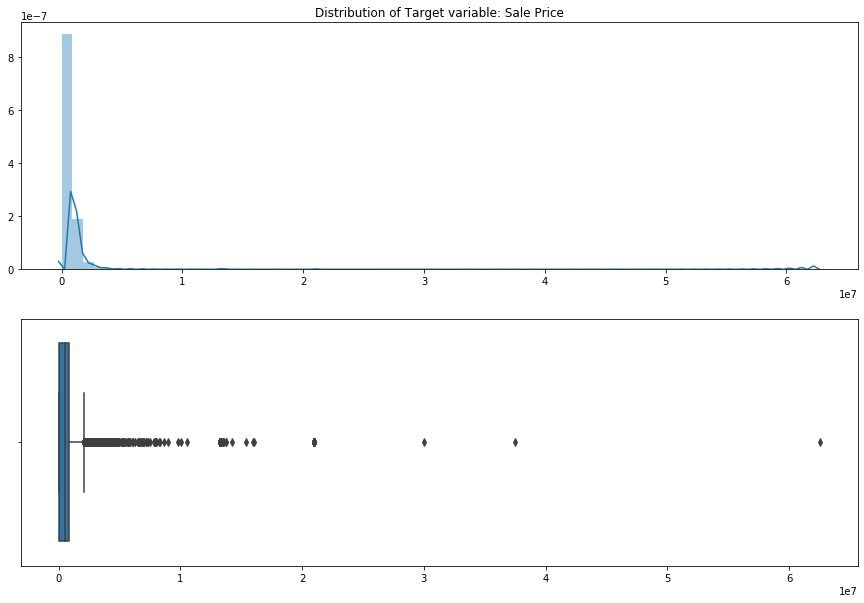

In [494]:
fig, ax = plt.subplots(2,1, figsize = (15,10))
sns.distplot(df_h_porch['SalePrice'].values, bins=70, ax=ax[0], hist=True)
sns.boxplot(df_h_porch['SalePrice'].values, ax=ax[1])
ax[0].set_title('Distribution of Target variable: Sale Price');

In [491]:
df_h_porch['SalePrice'].values

array([560000, 530000, 375000, ..., 955000, 695000, 632075])

In [506]:
df_h_porch.shape

(33990, 8)

In [143]:
df['SalePrice']

0         560000
1         435000
2         550000
3         409950
4         380000
          ...   
43862     930000
43863     850000
43864     686000
43865     695000
43866    1550000
Name: SalePrice, Length: 29895, dtype: int64

In [158]:
report_df = pd.DataFrame([])
report_df['AVG(SalePrice)'] = df['SalePrice'].mean()
report_df['AVG(SalePrice)']=
#report_df['NBR(PorchHouse)'] = len(df_h_porch['SalePrice'])
report_df.head()

,AVG(SalePrice)


In [152]:
print(report_df['AVG(SalePrice)'].values)

[]
